In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from sklearn import svm
from sklearn import datasets
from matplotlib.colors import ListedColormap
%matplotlib inline

In [76]:
def plotdata(X, y, lb_x, lb_y, c1_t, c2_t, c3_t, axes=None):
    c1 = np.in1d(y,[0]) 
    c2 = np.in1d(y,[1])
    c3 = np.in1d(y,[2])
    C1 = X[c1]
    C2 = X[c2]
    C3 = X[c3]
    if axes == None:
        axes = plt.gca()
    axes.scatter(C1[:,0], C1[:,1], marker='o',c='b',linewidth=1,label=c1_t)
    axes.scatter(C2[:,0], C2[:,1], marker='o',c='y',linewidth=1,label=c2_t)
    axes.scatter(C3[:,0], C3[:,1], marker='o',c='r',linewidth=1,label=c3_t)
    axes.set_xlabel(lb_x)
    axes.set_ylabel(lb_y)
    axes.legend(frameon=True,fancybox=True)

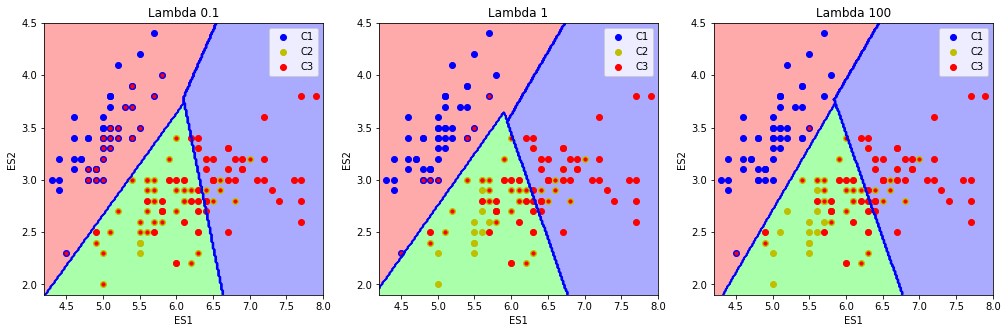

In [77]:
#数据初始化
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
fig,axes = plt.subplots(1,3,figsize=(17, 5))
for i, CC in enumerate([0.1, 1, 100]):
    #分类器初始化
    svc = svm.SVC(kernel='linear', C=CC)
    #决策边界数据初始化
    model = svc.fit(X, y)
    xx_min, xx_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    yy_min, yy_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(xx_min,xx_max,200), np.linspace(yy_min, yy_max,200))
    X_T = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_T)
    zz = zz.reshape(xx.shape)
    #绘制决策边界
    axes.flatten()[i].contour(xx, yy, zz, linewidth=1, colors='b')
    #将边界分割的区域填色
    camp_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    axes.flatten()[i].pcolormesh(xx, yy, zz, cmap=camp_light)
    #绘制散点图
    plotdata(X, y, "ES1", "ES2", "C1", "C2", "C3", axes.flatten()[i])
    #绘制支持向量
    axes.flatten()[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=10, facecolors='r')
    axes.flatten()[i].set_title("Lambda {}".format(CC))

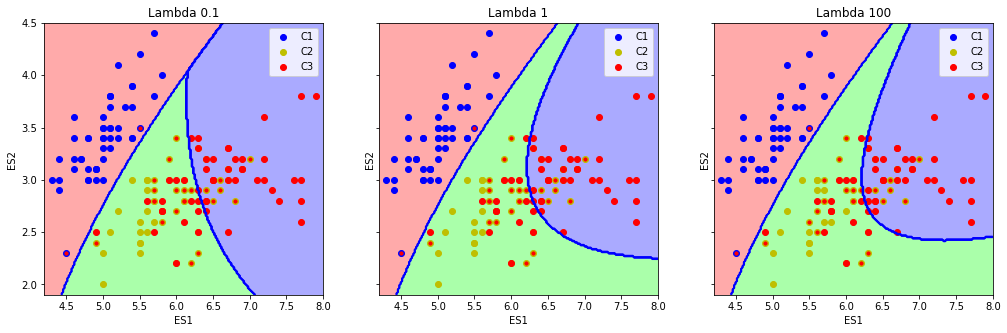

In [74]:
fig,axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(17, 5))
for i, CC in enumerate([0.1, 1, 100]):
    #分类器初始化
    svc = svm.SVC(kernel='poly', C=CC)
    #决策边界数据初始化
    model = svc.fit(X, y)
    xx_min, xx_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    yy_min, yy_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(xx_min,xx_max,200), np.linspace(yy_min, yy_max,200))
    X_T = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_T)
    zz = zz.reshape(xx.shape)
    #绘制决策边界
    axes.flatten()[i].contour(xx, yy, zz, linewidth=1, colors='b')
    #将边界分割的区域填色
    camp_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    axes.flatten()[i].pcolormesh(xx, yy, zz, cmap=camp_light)
    #绘制散点图
    plotdata(X, y, "ES1", "ES2", "C1", "C2", "C3", axes.flatten()[i])
    #绘制支持向量
    axes.flatten()[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=10, facecolors='r')
    axes.flatten()[i].set_title("Lambda {}".format(CC))    

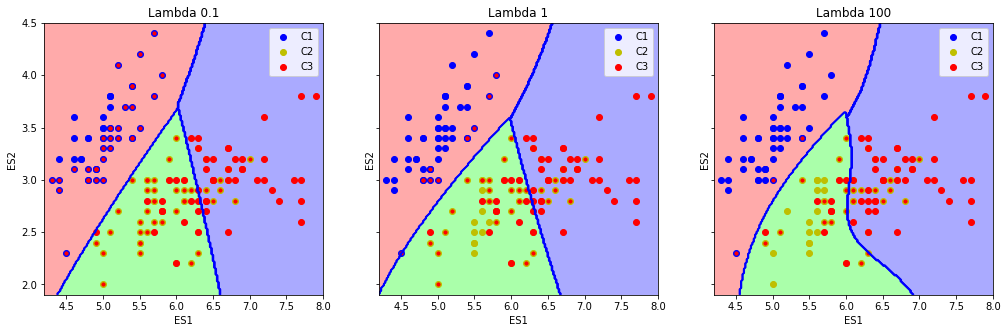

In [71]:
fig,axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(17, 5))
for i, CC in enumerate([0.1, 1, 100]):
    #分类器初始化
    svc = svm.SVC(kernel='rbf', C=CC)
    #决策边界数据初始化
    model = svc.fit(X, y)
    xx_min, xx_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    yy_min, yy_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(xx_min,xx_max,200), np.linspace(yy_min, yy_max,200))
    X_T = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_T)
    zz = zz.reshape(xx.shape)
    #绘制决策边界
    axes.flatten()[i].contour(xx, yy, zz, linewidth=1, colors='b')
    #将边界分割的区域填色
    camp_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    axes.flatten()[i].pcolormesh(xx, yy, zz, cmap=camp_light)
    #绘制散点图
    plotdata(X, y, "ES1", "ES2", "C1", "C2", "C3", axes.flatten()[i])
    #绘制支持向量
    axes.flatten()[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=10, facecolors='r')
    axes.flatten()[i].set_title("Lambda {}".format(CC)) 

In [ ]:
#支持向量(二分类)
def plotdata(data,y, lb_x, lb_y, c1_t, c2_t, axes=None):
    c1 = np.in1d(y, [1]) 
    c2 = np.in1d(y, [2])
    C1 = data[c1]
    C2 = data[c2]
    if axes == None:
        axes = plt.gca()
    axes.scatter(C1[:,0], C1[:,1], marker='o', c='b', linewidth=1, label=c1_t)
    axes.scatter(C2[:,0], C2[:,1], marker='o', c='y', linewidth=1, label=c2_t)
    axes.set_xlabel(lb_x)
    axes.set_ylabel(lb_y)
    axes.legend(frameon=True,fancybox=True)

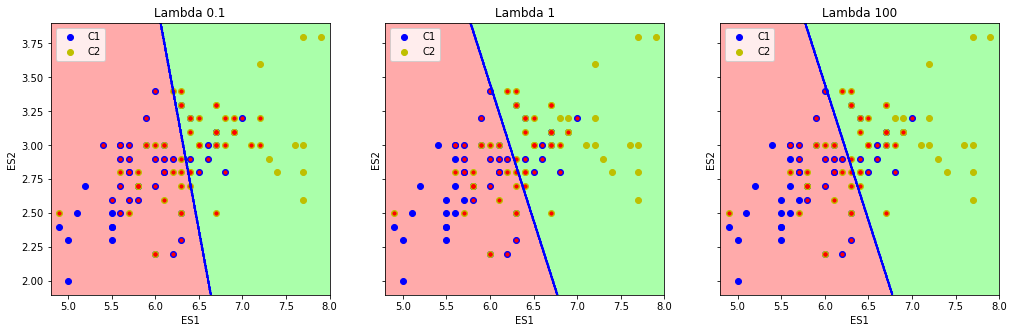

In [36]:
X_S = X[np.in1d(y, [1, 2])]
y_s = y[np.in1d(y, [1, 2])]
#分类器初始化
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))
for i, CC in enumerate([0.1, 1, 100]):
    svcc = svm.SVC(kernel='linear', C=CC)
    model = svcc.fit(X_S, y_s)
    #决策边界数据初始化
    xx_min, xx_max = X_S[:,0].min() - 0.1 , X_S[:,0].max() + 0.1
    yy_min, yy_max = X_S[:,1].min() - 0.1 , X_S[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(xx_min,xx_max,500), np.linspace(yy_min, yy_max,500))
    X_T_S = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_T_S)
    zz = zz.reshape(xx.shape)
    #绘制决策边界
    axes.flatten()[i].contour(xx, yy, zz, linewidth=1, colors='b')
    #将边界分割的区域填色
    camp_light = ListedColormap(['#FFAAAA','#AAFFAA'])
    axes.flatten()[i].pcolormesh(xx, yy, zz, cmap=camp_light)
    #绘制散点图
    plotdata(X_S,y_s,"ES1", "ES2", "C1", "C2", axes.flatten()[i])
    #绘制支持向量
    axes.flatten()[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=10, facecolors='r')
    axes.flatten()[i].set_title("Lambda {}".format(CC))